# Portfolio Optimization Using Network Analysis and Monte Carlo Simulation


Context and Problem Statement

Portfolio optimization is one of the most important techniques in quantitative finance, aiming to maximize returns while minimizing risk through diversification. Rather than investing in a single asset or blindly tracking a market index such as the S&P 500, investors can construct portfolios that balance risk and return more efficiently by combining multiple assets with different characteristics.
Modern portfolio construction goes beyond simple return comparisons. It involves understanding relationships between assets, measuring volatility and correlation, evaluating risk-adjusted performance using metrics such as the Sharpe ratio, and exploring a wide range of possible asset allocations. In addition, network-based analysis allows us to identify central and peripheral assets in a financial system, providing deeper insight into how stocks interact with each other.
The goal of this project is to construct and analyze an optimized stock portfolio using historical market data, network analysis, and Monte Carlo simulation. By simulating thousands of potential portfolios, we aim to identify the most efficient allocation that maximizes risk-adjusted return while maintaining controlled volatility.

Project Objectives

The main objectives of this project are:
- To analyze the relationships between selected stocks using correlation-based network analysis
- To measure individual asset risk, return, and centrality within the network
- To construct portfolios with different weight allocations and evaluate their performance
- To identify the optimal portfolio using Monte Carlo simulation and the Sharpe ratio
- To visualize and interpret the Efficient Frontier as the core outcome of the analysis

Proposed Approach and Methodology

The analysis follows a structured, step-by-step workflow commonly used in quantitative finance and data science projects:
1. Data Collection
Historical adjusted closing price data is collected from Yahoo Finance
The selected time period is from January 2025 to December 2025
All assets are aligned on the same trading dates to ensure consistency

2. Return Calculation
Daily log returns are computed for each stock
Log returns are preferred due to their time-additive properties and numerical stability

3. Risk and Correlation Analysis
A covariance matrix is computed from log returns to measure joint volatility
A correlation matrix is derived to capture relationships between assets

4. Network Construction and Analysis
Stocks are represented as nodes in a financial network
Edge weights are based on correlation-derived distances
A Minimum Spanning Tree (MST) is constructed to simplify the network structure
Network centrality measures are calculated:
Degree Centrality – number of direct connections
Betweenness Centrality – importance as a bridge between assets
Eigenvector Centrality – influence based on connections to other influential assets

5. Portfolio Metrics
Average daily return and volatility are computed for each stock
An equally weighted portfolio is used as a baseline
The Sharpe ratio is calculated to evaluate risk-adjusted performance

6. Monte Carlo Simulation
10,000 random portfolios are simulated
Each simulation generates:
A random set of portfolio weights (summing to 1)
Expected portfolio return
Portfolio volatility
Sharpe ratio

7. Efficient Frontier and Optimal Portfolio
The Efficient Frontier is visualized as the risk–return space of simulated portfolios
The portfolio with the maximum Sharpe ratio is identified as the optimal allocation
This portfolio represents the best balance between return and risk among all simulated scenarios

Dataset Description:
The portfolio consists of 15 large-cap U.S. stocks across multiple sectors to ensure diversification.
Technology: AAPL, MSFT, NVDA, GOOG, META, AMZN
Finance: JPM, MS
Energy: XOM, CVX
Healthcare: JNJ, PFE
Consumer & Retail: WMT,AMZN
EV: TSLA, NIO
This diverse selection allows to capture sector interactions and picture a realistic portfolio behavior.

In [75]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import yfinance as yf
import networkx as nx
import plotly.express as px

In [76]:
# creating a list of portfolio tickers
tickers_list = ["AAPL", "MSFT", "NVDA", "GOOG", "META", "TSLA", "NIO", "JPM",
                "MS", "XOM", "CVX", "JNJ", "PFE", "AMZN", "WMT"]

Once we created the list of stocks that we want to use for portfolio optimization, we can download the actual market data from Yahoo Finance for the year 2025.

In [77]:
# dowloading the dataset
raw_data = yf.download(tickers_list, start="2025-01-01", end="2025-12-07",
                       auto_adjust=True)
raw_data

[*********************100%***********************]  15 of 15 completed


Price            Close                                                  \
Ticker            AAPL        AMZN         CVX        GOOG         JNJ   
Date                                                                     
2025-01-02  242.752106  220.220001  140.210297  189.890732  139.742386   
2025-01-03  242.264313  224.190002  141.299789  192.381042  139.907333   
2025-01-06  243.896912  227.610001  140.735901  197.192307  139.393066   
2025-01-07  241.119492  222.110001  142.962692  195.947144  141.886734   
2025-01-08  241.607269  222.130005  143.641251  194.632294  138.044373   
...                ...         ...         ...         ...         ...   
2025-12-01  283.100006  233.880005  152.539993  314.914520  205.339996   
2025-12-02  286.190002  234.419998  150.250000  315.813934  205.419998   
2025-12-03  284.149994  232.380005  151.589996  320.410950  205.330002   
2025-12-04  280.700012  229.110001  152.259995  318.182434  202.479996   
2025-12-05  278.779999  229.529999  150.000000  321.879974  201.929993   

Price                                                             ...  \
Ticker             JPM        META          MS        MSFT   NIO  ...   
Date                                                              ...   
2025-01-02  235.024780  597.843567  121.381195  415.514832  4.55  ...   
2025-01-03  238.236771  603.220947  122.509605  420.249939  4.63  ...   
2025-01-06  237.075272  628.731384  125.136047  424.716919  4.71  ...   
2025-01-07  239.358902  616.450073  123.423988  419.277100  4.51  ...   
2025-01-08  239.319534  609.296753  124.377296  421.451080  4.32  ...   
...                ...         ...         ...         ...   ...  ...   
2025-12-01  308.920013  640.869995  168.470001  486.739990  5.18  ...   
2025-12-02  307.880005  647.099976  169.089996  490.000000  5.03  ...   
2025-12-03  312.130005  639.599976  173.720001  477.730011  4.79  ...   
2025-12-04  316.100006  661.530029  174.889999  480.839996  5.01  ...   
2025-12-05  315.040009  673.419983  176.509995  483.160004  5.04  ...   

Price        Volume                                                    \
Ticker          JPM      META       MS      MSFT       NIO       NVDA   
Date                                                                    
2025-01-02  9220900  12682300  5014300  16896500  63007700  198247200   
2025-01-03  9491100  11436800  3988400  16662900  35597900  229322500   
2025-01-06  9917800  14560800  6665200  20573600  53340700  265377400   
2025-01-07  8753400  12071500  7268800  18139100  61962000  351782200   
2025-01-08  8675300  10085800  5744500  15054600  49570100  227349900   
...             ...       ...      ...       ...       ...        ...   
2025-12-01  7727300  13029900  4393500  23964000  58805800  188131000   
2025-12-02  7249000  11640900  4338700  19562700  43612900  182632200   
2025-12-03  8535300  11134300  6223300  34615100  94553700  165138000   
2025-12-04  9627800  29874600  4813200  22318200  57001900  167364900   
2025-12-05  6518900  21207900  4641600  22608700  36110800  143971100   

Price                                                
Ticker           PFE       TSLA       WMT       XOM  
Date                                                 
2025-01-02  32899200  109710700  14820400  12685400  
2025-01-03  33417000   95423300  10834600  14237900  
2025-01-06  43951000   85516500  14519900  15623700  
2025-01-07  35030000   75699500  11238000  12625900  
2025-01-08  35430700   73038800  13453600  17858100  
...              ...        ...       ...       ...  
2025-12-01  53198600   57463600  17236800  12658100  
2025-12-02  43827000   69336600  18711800  14607700  
2025-12-03  56121200   87483000  24478300  16819100  
2025-12-04  35454000   71906500  25905100  13686900  
2025-12-05  47443700   56427500  23956400  12516900  

[233 rows x 75 columns]

As per the dataset, we have 233 rows and 75 columns. All price-related columns are already adjusted, meaning they reflect prices after splits, dividends, and other corporate actions. This allows us to work with more reliable values and calculate accurate returns. Most of these columns, however, are not needed for our analysis. Since we focus on constructing a portfolio and analyzing stock relationships, we only need the adjusted closing price. Therefore, we will remove unnecessary columns such as Open, High, Low, etc., and keep only the “Close” column, which represents the final adjusted price for each day.

In [78]:
df = raw_data["Close"]
df

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Date,,,,,,,,,,,,,,,
2025-01-02,242.752106,220.220001,140.210297,189.890732,139.742386,235.024780,597.843567,121.381195,415.514832,4.55,138.272171,24.814529,379.279999,89.328407,103.511002
2025-01-03,242.264313,224.190002,141.299789,192.381042,139.907333,238.236771,603.220947,122.509605,420.249939,4.63,144.430496,24.795879,410.440002,90.102592,104.041534
2025-01-06,243.896912,227.610001,140.735901,197.192307,139.393066,237.075272,628.731384,125.136047,424.716919,4.71,149.389130,25.075636,411.049988,90.747734,103.925774
2025-01-07,241.119492,222.110001,142.962692,195.947144,141.886734,239.358902,616.450073,123.423988,419.277100,4.51,140.101669,25.299442,394.359985,90.132362,104.900032
2025-01-08,241.607269,222.130005,143.641251,194.632294,138.044373,239.319534,609.296753,124.377296,421.451080,4.32,140.071686,25.047661,394.940002,91.114975,103.144455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-01,283.100006,233.880005,152.539993,314.914520,205.339996,308.920013,640.869995,168.470001,486.739990,5.18,179.909988,25.270000,430.140015,111.529999,116.629997
2025-12-02,286.190002,234.419998,150.250000,315.813934,205.419998,307.880005,647.099976,169.089996,490.000000,5.03,181.449905,25.150000,429.239990,112.410004,115.379997
2025-12-03,284.149994,232.380005,151.589996,320.410950,205.330002,312.130005,639.599976,173.720001,477.730011,4.79,179.580002,25.570000,446.739990,114.410004,117.800003


#### *EDA ANALYSIS*

After we created a new DataFrame containing only the information we need, we can move on to analyzing the data.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2025-01-02 to 2025-12-05
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    233 non-null    float64
 1   AMZN    233 non-null    float64
 2   CVX     233 non-null    float64
 3   GOOG    233 non-null    float64
 4   JNJ     233 non-null    float64
 5   JPM     233 non-null    float64
 6   META    233 non-null    float64
 7   MS      233 non-null    float64
 8   MSFT    233 non-null    float64
 9   NIO     233 non-null    float64
 10  NVDA    233 non-null    float64
 11  PFE     233 non-null    float64
 12  TSLA    233 non-null    float64
 13  WMT     233 non-null    float64
 14  XOM     233 non-null    float64
dtypes: float64(15)
memory usage: 29.1 KB


As per the information, the DataFrame contains 233 rows and 15 columns (one for each ticker). All columns have a float dtype, and there are no missing values, meaning we have a recorded price for every trading day of the year for each stock in the dataset, however, we can still confirm this using the isnull() function as part of the standard process.

In [80]:
df.isnull().sum()

Ticker
AAPL    0
AMZN    0
CVX     0
GOOG    0
JNJ     0
JPM     0
META    0
MS      0
MSFT    0
NIO     0
NVDA    0
PFE     0
TSLA    0
WMT     0
XOM     0
dtype: int64

As we can see from the output of the function, there are no missing values in the DataFrame. Now, we shift the data by one row so that each day's price is aligned with the previous day's price. This step is necessary because returns are calculated by comparing today's price to yesterday's price.

#### *Computing the Daily Log Returns*

In [81]:
df.shift(1)

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Date,,,,,,,,,,,,,,,
2025-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,242.752106,220.220001,140.210297,189.890732,139.742386,235.024780,597.843567,121.381195,415.514832,4.55,138.272171,24.814529,379.279999,89.328407,103.511002
2025-01-06,242.264313,224.190002,141.299789,192.381042,139.907333,238.236771,603.220947,122.509605,420.249939,4.63,144.430496,24.795879,410.440002,90.102592,104.041534
2025-01-07,243.896912,227.610001,140.735901,197.192307,139.393066,237.075272,628.731384,125.136047,424.716919,4.71,149.389130,25.075636,411.049988,90.747734,103.925774
2025-01-08,241.119492,222.110001,142.962692,195.947144,141.886734,239.358902,616.450073,123.423988,419.277100,4.51,140.101669,25.299442,394.359985,90.132362,104.900032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-01,278.850006,233.220001,151.130005,319.911285,206.919998,313.079987,647.950012,169.660004,492.010010,5.50,176.990143,25.740000,430.170013,110.510002,115.919998
2025-12-02,283.100006,233.880005,152.539993,314.914520,205.339996,308.920013,640.869995,168.470001,486.739990,5.18,179.909988,25.270000,430.140015,111.529999,116.629997
2025-12-03,286.190002,234.419998,150.250000,315.813934,205.419998,307.880005,647.099976,169.089996,490.000000,5.03,181.449905,25.150000,429.239990,112.410004,115.379997


In [82]:
# Using lagorithm to make the data more symmetric and less skewed
log_returns = np.log(df/df.shift(1))
log_returns.dropna()

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Date,,,,,,,,,,,,,,,
2025-01-03,-0.002011,0.017867,0.007740,0.013029,0.001180,0.013574,0.008954,0.009253,0.011331,0.017430,0.043574,-0.000752,0.078955,0.008629,0.005112
2025-01-06,0.006716,0.015140,-0.003999,0.024701,-0.003683,-0.004887,0.041421,0.021212,0.010573,0.017131,0.033756,0.011219,0.001485,0.007135,-0.001113
2025-01-07,-0.011453,-0.024461,0.015699,-0.006334,0.017731,0.009586,-0.019727,-0.013776,-0.012891,-0.043391,-0.064186,0.008886,-0.041451,-0.006804,0.009331
2025-01-08,0.002021,0.000090,0.004735,-0.006733,-0.027454,-0.000164,-0.011672,0.007694,0.005172,-0.043042,-0.000214,-0.010002,0.001470,0.010843,-0.016877
2025-01-10,-0.024399,-0.014465,0.018719,-0.011427,-0.001477,-0.013499,0.008381,-0.035100,-0.013302,-0.035339,-0.030435,-0.005226,-0.000507,0.012987,-0.003654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-01,0.015126,0.002826,0.009286,-0.015742,-0.007665,-0.013376,-0.010987,-0.007039,-0.010769,-0.059943,0.016363,-0.018428,-0.000070,0.009188,0.006106
2025-12-02,0.010856,0.002306,-0.015126,0.002852,0.000390,-0.003372,0.009674,0.003673,0.006675,-0.029385,0.008523,-0.004760,-0.002095,0.007859,-0.010776
2025-12-03,-0.007154,-0.008740,0.008879,0.014451,-0.000438,0.013710,-0.011658,0.027014,-0.025360,-0.048890,-0.010359,0.016562,0.039961,0.017636,0.020757


In [83]:
# visualizing the tabel to see the correlation of each stock
log_corr = log_returns.corr()
log_corr

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Ticker,,,,,,,,,,,,,,,
AAPL,1.000000,0.570996,0.466104,0.500234,0.094442,0.533791,0.489084,0.586437,0.485812,0.236388,0.424751,0.290493,0.522004,0.405614,0.396898
AMZN,0.570996,1.000000,0.338727,0.535325,-0.157751,0.556242,0.669053,0.597401,0.595534,0.294783,0.565196,0.122054,0.530758,0.276747,0.286527
CVX,0.466104,0.338727,1.000000,0.198817,0.143644,0.425111,0.302319,0.416253,0.261185,0.196193,0.278694,0.337617,0.293181,0.161078,0.863295
GOOG,0.500234,0.535325,0.198817,1.000000,-0.066460,0.443617,0.440698,0.502402,0.439652,0.218702,0.475963,0.097113,0.542946,0.187654,0.165528
JNJ,0.094442,-0.157751,0.143644,-0.066460,1.000000,0.053602,-0.165996,-0.002920,-0.152206,-0.033034,-0.264506,0.460153,-0.040471,0.128756,0.174745
JPM,0.533791,0.556242,0.425111,0.443617,0.053602,1.000000,0.519209,0.854343,0.511642,0.176175,0.479577,0.229264,0.522522,0.432261,0.385816
META,0.489084,0.669053,0.302319,0.440698,-0.165996,0.519209,1.000000,0.592041,0.653161,0.258883,0.526621,0.075676,0.514854,0.340876,0.223696
MS,0.586437,0.597401,0.416253,0.502402,-0.002920,0.854343,0.592041,1.000000,0.547548,0.198804,0.576217,0.258368,0.547968,0.426252,0.357046
MSFT,0.485812,0.595534,0.261185,0.439652,-0.152206,0.511642,0.653161,0.547548,1.000000,0.162373,0.638540,0.035935,0.476794,0.297173,0.194454


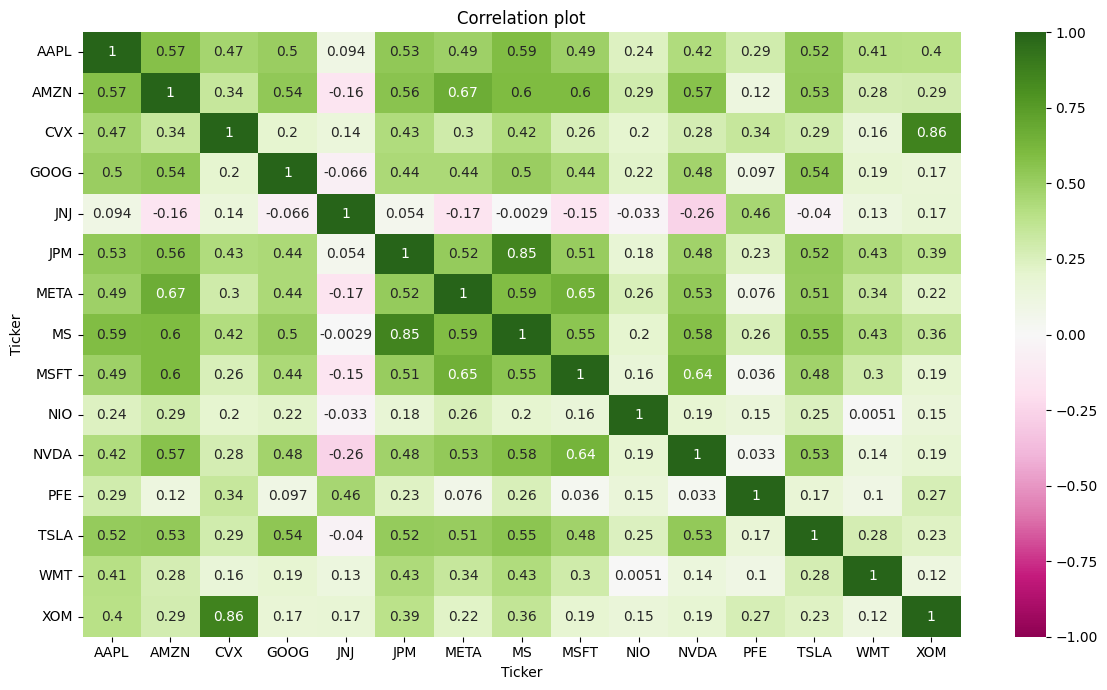

In [84]:
plt.figure(figsize=(12,7))
sns.heatmap(data=log_corr, annot=True, vmin=-1, vmax=1, cmap="PiYG")
plt.title("Correlation plot")
plt.tight_layout()
plt.show()

As seen in the correlation plot, the strongest correlation appears between CVX and XOM (commodity/energy stocks) at 0.86, followed by JPM and MS (banking sector) at 0.85. These stocks move very closely together, meaning sector-wide events are likely to impact all stocks within that sector rather than just one individual ticker.

On the opposite side, JNJ and NVDA show almost no correlation, indicating that price movements in the tech sector do not significantly influence JNJ, which is a healthcare/pharmaceutical stock.

Most of the remaining correlations fall within the 0.44–0.64 range. This suggests moderate relationships: the stocks affect each other to some extent, but not strongly enough to be considered highly dependent. This level of correlation supports diversification, as the portfolio is not dominated by a single cluster of highly correlated assets.

Next, we convert our correlation values into a distance matrix. This transformation makes the data more stable and easier to compare, because stocks with high correlation become close to each other (small distance), while stocks with low correlation appear far apart (large distance). This allows us to analyze the relationships in a clearer and more structured way.

In [85]:
# distance matrix
distance_matrix = np.sqrt(2*(1-log_corr))
distance_matrix

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Ticker,,,,,,,,,,,,,,,
AAPL,0.000000,0.926287,1.033340,0.999766,1.345777,0.965618,1.010857,0.909464,1.014089,1.235809,1.072613,1.191224,0.977748,1.090308,1.098273
AMZN,0.926287,0.000000,1.150020,0.964028,1.521678,0.942081,0.813569,0.897329,0.899406,1.187617,0.932528,1.325100,0.968754,1.202708,1.194549
CVX,1.033340,1.150020,0.000000,1.265846,1.308706,1.072277,1.181254,1.080507,1.215578,1.267917,1.201088,1.150984,1.188965,1.295316,0.522886
GOOG,0.999766,0.964028,1.265846,0.000000,1.460452,1.054877,1.057641,0.997595,1.058629,1.250038,1.023755,1.343791,0.956090,1.274634,1.291876
JNJ,1.345777,1.521678,1.308706,1.460452,0.000000,1.375789,1.527086,1.416277,1.518029,1.437383,1.590287,1.039083,1.442547,1.320033,1.284722
JPM,0.965618,0.942081,1.072277,1.054877,1.375789,0.000000,0.980603,0.539734,0.988290,1.283608,1.020219,1.241560,0.977219,1.065588,1.108318
META,1.010857,0.813569,1.181254,1.057641,1.527086,0.980603,0.000000,0.903282,0.832873,1.217471,0.973015,1.359650,0.985034,1.148150,1.246037
MS,0.909464,0.897329,1.080507,0.997595,1.416277,0.539734,0.903282,0.000000,0.951265,1.265856,0.920633,1.217894,0.950823,1.071212,1.133979
MSFT,1.014089,0.899406,1.215578,1.058629,1.518029,0.988290,0.832873,0.951265,0.000000,1.294316,0.850247,1.388571,1.022942,1.185603,1.269288


#### *NETWORK CONNECTIONS ANALYSIS*

In [86]:
# building a network distance
network_distance = nx.from_pandas_adjacency(distance_matrix)

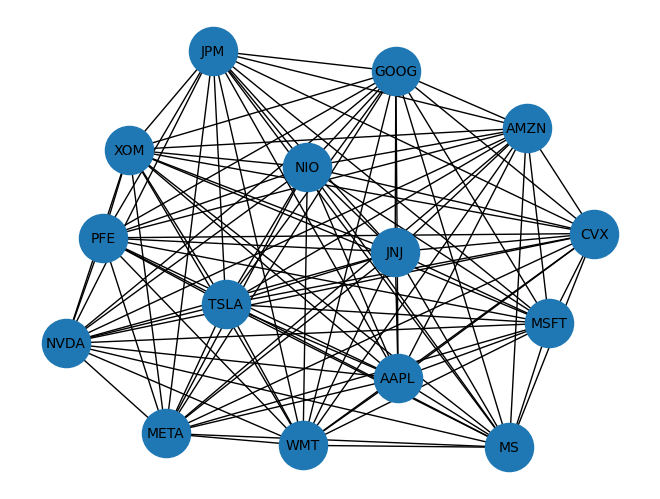

<Figure size 1200x700 with 0 Axes>

In [87]:
#generating node positions network
node_positions = nx.spring_layout(network_distance, seed=42)
nx.draw(network_distance, with_labels=True, node_size=1200, font_size=10)
plt.figure(figsize=(12,7))
plt.show()

Because the fully connected graph is visually dense and does not reveal meaningful relationships, we will use a Minimum Spanning Tree (MST) to extract the most informative edges and reveal the true structure of the network.

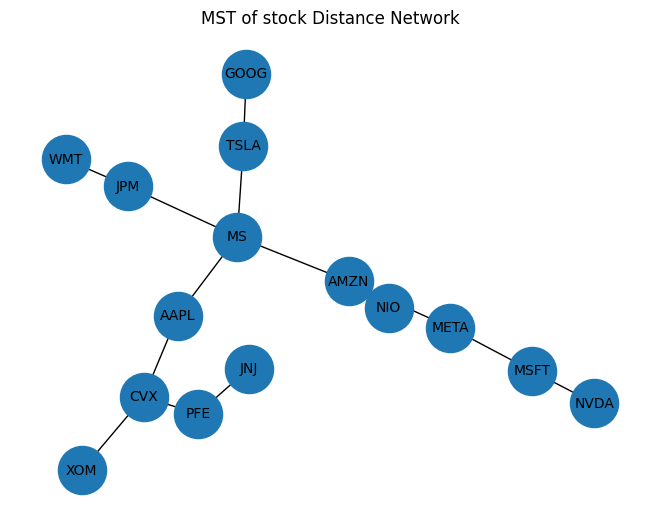

In [88]:
# creating a minimum_spanning_tree
mst = nx.minimum_spanning_tree(network_distance)
mst_positions = nx.spring_layout(mst, seed=42)
nx.draw(mst, mst_positions, with_labels=True, node_size=1200,font_size=10)
plt.title("MST of stock Distance Network")
plt.show()

From the MST graph, we can see that Morgan Stanley (MS) appears as the central node with the most direct connections. This indicates that MS has relatively strong relationships (short distances) with multiple stocks from different sectors. In the MST structure, this type of centrality means that MS acts as a bridge between several parts of the network. Any significant movement in MS could therefore influence the stocks that are closest to it, such as AAPL, AMZN, TSLA, and JPM.
Walmart (WMT) and Google(GOOG), on the other hand, are positioned on the outer branches of the tree with fewer direct connections. This suggests they behave more independently relative to the rest of the portfolio and is less affected by price changes in the other sectors.

In [89]:
# finding the shortest path between the mean
avg_short_path = nx.average_shortest_path_length(mst)
print(f"Shortest path length 2025: {avg_short_path}")

Shortest path length 2025: 3.5047619047619047


The average shortest path length in the MST is approximately 3.50, meaning that on average any stock can be reached from any other stock in about 3 to 4 steps.

In [90]:
# finding degree centrality
degree_centrality = nx.degree_centrality(mst)
pd.Series(degree_centrality).sort_values(ascending=False)

MS      0.285714
AMZN    0.214286
CVX     0.214286
AAPL    0.142857
JPM     0.142857
META    0.142857
MSFT    0.142857
PFE     0.142857
TSLA    0.142857
GOOG    0.071429
JNJ     0.071429
NIO     0.071429
NVDA    0.071429
WMT     0.071429
XOM     0.071429
dtype: float64

The degree centrality shows how many direct connections each node has, expressed on a scale from 0 to 1. The output confirms that MS is the most central stock (0.28), meaning it connects to more stocks than any other node in the network. AMZN and CVX have lower centrality values (0.21 each), indicating that they are still influential but less central than MS. The remaining stocks have much smaller centrality scores, which means they have fewer direct connections and therefore minimal influence on the overall network structure.

In [91]:
# finding betweenness centrality
betweenness_centrality = nx.betweenness_centrality(mst)
pd.Series(betweenness_centrality).sort_values(ascending=False)

MS      0.758242
AMZN    0.472527
AAPL    0.439560
CVX     0.384615
META    0.263736
JPM     0.142857
MSFT    0.142857
PFE     0.142857
TSLA    0.142857
GOOG    0.000000
JNJ     0.000000
NIO     0.000000
NVDA    0.000000
WMT     0.000000
XOM     0.000000
dtype: float64

The betweenness centrality results show that MS has the highest score (0.758), confirming its role as the primary bridge in the 2025 stock network. This means MS lies on most of the shortest paths between other stocks and therefore plays a key role in connecting different sectors such as banking, tech, commodities, and retail. AMZN (0.47), AAPL (0.44), and CVX (0.38) also exhibit relatively high betweenness values, indicating that they, too, function as important connectors rather than simple peripheral nodes. The rest of the stocks have very low or zero betweenness, meaning they are on the outer edges of the network and do not typically serve as intermediaries between other stocks.

In [92]:
# eigenvector centrality
eigenvector = nx.eigenvector_centrality_numpy(mst)
pd.Series(eigenvector).sort_values(ascending=False)

MS      0.569796
AMZN    0.409645
AAPL    0.344814
JPM     0.294605
TSLA    0.294605
CVX     0.243330
META    0.222497
NIO     0.173714
PFE     0.125811
GOOG    0.124930
WMT     0.124930
MSFT    0.115039
XOM     0.103187
JNJ     0.053351
NVDA    0.048784
dtype: float64

The eigenvector centrality results show that the most influential node in the network is MS (0.56), meaning it is connected to other highly important stocks such as AMZN, AAPL, and TSLA. These nodes gain influence because they sit close to the core of the minimum spanning tree.
On the other hand, NVDA receives a low eigenvector centrality score, not because it is an unimportant company, but because within this specific 2025 MST structure it appears on the outer edge, with only one connection (MSFT).

In [93]:
# building a covariance matrix
cov_matrix = log_returns.cov()
cov_matrix

Ticker,AAPL,AMZN,CVX,GOOG,JNJ,JPM,META,MS,MSFT,NIO,NVDA,PFE,TSLA,WMT,XOM
Ticker,,,,,,,,,,,,,,,
AAPL,0.000438,0.000265,0.000154,0.000214,2.449952e-05,0.000175,0.000251,2.438609e-04,0.000157,0.000202,0.000285,0.000101,0.000444,0.000136,0.000125
AMZN,0.000265,0.000493,0.000119,0.000243,-4.342986e-05,0.000193,0.000364,2.636400e-04,0.000205,0.000267,0.000403,0.000045,0.000479,0.000099,0.000096
CVX,0.000154,0.000119,0.000248,0.000064,2.806443e-05,0.000105,0.000117,1.303638e-04,0.000064,0.000126,0.000141,0.000088,0.000188,0.000041,0.000205
GOOG,0.000214,0.000243,0.000064,0.000416,-1.680964e-05,0.000142,0.000220,2.036948e-04,0.000139,0.000182,0.000312,0.000033,0.000450,0.000061,0.000051
JNJ,0.000024,-0.000043,0.000028,-0.000017,1.536544e-04,0.000010,-0.000050,-7.192347e-07,-0.000029,-0.000017,-0.000105,0.000095,-0.000020,0.000026,0.000033
JPM,0.000175,0.000193,0.000105,0.000142,1.040421e-05,0.000245,0.000199,2.658231e-04,0.000124,0.000113,0.000241,0.000060,0.000332,0.000109,0.000091
META,0.000251,0.000364,0.000117,0.000220,-5.040336e-05,0.000199,0.000600,2.881672e-04,0.000248,0.000259,0.000414,0.000031,0.000512,0.000134,0.000083
MS,0.000244,0.000264,0.000130,0.000204,-7.192347e-07,0.000266,0.000288,3.948258e-04,0.000168,0.000161,0.000367,0.000085,0.000442,0.000136,0.000107
MSFT,0.000157,0.000205,0.000064,0.000139,-2.919781e-05,0.000124,0.000248,1.683727e-04,0.000239,0.000103,0.000317,0.000009,0.000300,0.000074,0.000045


In [94]:
# converting to variance 
variance = np.diag(cov_matrix)
variance_series = pd.Series(variance, index=cov_matrix.columns).sort_values(ascending=False)
variance_series

Ticker
NIO     0.001665
TSLA    0.001649
NVDA    0.001030
META    0.000600
AMZN    0.000493
AAPL    0.000438
GOOG    0.000416
MS      0.000395
PFE     0.000276
WMT     0.000257
CVX     0.000248
JPM     0.000245
MSFT    0.000239
XOM     0.000227
JNJ     0.000154
dtype: float64

In [95]:
# converting variance to standard deviation
std = pd.Series(np.sqrt(variance_series)).sort_values(ascending=False)
std

Ticker
NIO     0.040808
TSLA    0.040607
NVDA    0.032096
META    0.024496
AMZN    0.022210
AAPL    0.020928
GOOG    0.020404
MS      0.019870
PFE     0.016621
WMT     0.016045
CVX     0.015761
JPM     0.015659
MSFT    0.015476
XOM     0.015066
JNJ     0.012396
dtype: float64

The standard deviation of log returns represents the daily volatility of each stock. Stocks such as NIO (0.0408), TSLA (0.0406), and NVDA (0.0321) exhibit the highest volatility, indicating higher risk and larger price fluctuations. In contrast, JNJ (0.0124), XOM (0.0151), and MSFT (0.0155) show the lowest volatility, making them the most stable stocks in the portfolio.

In [96]:
# finding average return per each stock
avr_return = pd.Series(log_returns.mean()).sort_values(ascending=False)
avr_return

Ticker
GOOG    0.002275
MS      0.001614
JNJ     0.001587
JPM     0.001263
NVDA    0.001194
WMT     0.001093
TSLA    0.000785
MSFT    0.000650
AAPL    0.000596
META    0.000513
XOM     0.000511
NIO     0.000441
CVX     0.000291
PFE     0.000206
AMZN    0.000178
dtype: float64

As per the output, the highest average daily return is observed for Google (0.0022), followed by MS (0.0016), JNJ (0.0015), and JPM (0.0012). The lowest average returns are observed for PFE (0.0002) and AMZN (0.0001). These values reflect average daily performance only and do not account for volatility or risk.

In [97]:
# finding sharpe ratio(assuming risk-free rate=0)
sharpe_ratio = pd.Series((avr_return-0)/std).sort_values(ascending=False)
sharpe_ratio

Ticker
JNJ     0.128006
GOOG    0.111480
MS      0.081226
JPM     0.080656
WMT     0.068120
MSFT    0.042010
NVDA    0.037204
XOM     0.033918
AAPL    0.028502
META    0.020947
TSLA    0.019321
CVX     0.018457
PFE     0.012402
NIO     0.010803
AMZN    0.008036
dtype: float64

The Sharpe ratio results show that JNJ and GOOG provide the strongest risk-adjusted performance in the portfolio, offering higher returns per unit of volatility. Financial stocks such as MS and JPM also exhibit strong Sharpe ratios, indicating a good balance between return and risk. In contrast, high-volatility stocks such as TSLA, NIO, and AMZN show lower Sharpe ratios, meaning their higher risk is not sufficiently compensated by higher average returns.

#### *EQUEL PORTFOLIO WEIGHTS*

In [98]:
# creating equel portfolio weights
n_assets = len(avr_return)
weights = np.array([1/n_assets] * n_assets)
weights


array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [99]:
# expected portfolio return
portfolio_return = np.dot(weights, avr_return)
portfolio_return

np.float64(0.0008798077732737812)

The expected daily return of the equally weighted portfolio is 0.00088, which corresponds to approximately 0.088% per day. It means that on average, the portfolio is expected to grow by about 0.09% per day.

In [100]:
# portfolio risk
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_std = np.sqrt(portfolio_variance)
portfolio_std

np.float64(0.013594374444282704)

The equally weighted portfolio has a daily volatility of approximately 1.36%, meaning that on a typical trading day the portfolio return is expected to fluctuate by about +/- 1.36% around its average return. When compared to individual high volatility stocks such as TSLA (4%) and NIO (4.2%), the portfolio shows significantly lower overall risk. This reduction in volatility indicates that the portfolio benefits from diversification, where the combined behavior of multiple assets smooths out extreme price movements. As a result, the diversified portfolio is more stable and helps mitigate overall portfolio risk.

#### *FINDING EFFICIENT FRONTIER*

To identify the efficient frontier, which represents the best possible combinations of asset weights in terms of risk and return, a Monte Carlo simulation will be applied. Thousands of random portfolio weight combinations will be generated, and for each simulated portfolio the expected return and volatility will be calculated. The collection of these portfolios allows us to approximate the efficient frontier, defined as the set of portfolios that offer the highest expected return for a given level of risk.

In [101]:
# Monte Carlo simulation
n_portfolios = 10000

portfolio_returns = []
portfolio_risks = []
portfolio_sharpes = []
portfolio_weights= []


for n in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)

    p_retern = np.dot(weights, avr_return)
    p_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    p_std = np.sqrt(p_variance)

    p_sharpe_ratio = p_retern/p_std

    portfolio_returns.append(p_retern)
    portfolio_risks.append(p_std)
    portfolio_sharpes.append(p_sharpe_ratio)
    portfolio_weights.append(weights)

portfolio_df = pd.DataFrame({
    "return": portfolio_returns,
    "risks": portfolio_risks,
    "sharpes": portfolio_sharpes
})

portfolio_df.shape
portfolio_df

,return,risks,sharpes
0,0.000797,0.012413,0.064206
1,0.000817,0.014811,0.055187
2,0.000883,0.014090,0.062674
3,0.000936,0.016132,0.058047
4,0.000890,0.012842,0.069287
...,...,...,...
9995,0.001105,0.011557,0.095642
9996,0.000923,0.014635,0.063086
9997,0.000891,0.016119,0.055293
9998,0.000893,0.013521,0.066012


This Monte Carlo simulation generates 10,000 random portfolios by randomly assigning weights to the assets while ensuring the total allocation sums to 1. For each portfolio, the expected return, volatility, and Sharpe ratio are calculated. This allows us to explore the risk–return space of possible portfolios and approximate the efficient frontier.

In [102]:
portfolio_df.describe()

,return,risks,sharpes
count,10000.000000,10000.000000,10000.000000
mean,0.000880,0.013872,0.063894
std,0.000092,0.001124,0.008852
min,0.000553,0.010173,0.036360
25%,0.000819,0.013094,0.057942
50%,0.000879,0.013824,0.063513
75%,0.000941,0.014616,0.069673
max,0.001249,0.018309,0.097397


The Monte Carlo simulation shows that daily portfolio returns range from approximately 0.055% to 0.128%, while portfolio risk ranges from 1.03% to 1.86%. Higher returns are generally associated with higher risk, illustrating the classic risk–return trade-off. Most randomly generated portfolios cluster around a daily return of 0.088% with volatility near 1.39%, indicating that diversification significantly reduces extreme risk. Rather than selecting portfolios based on return alone, the optimal choice depends on risk-adjusted performance, which is captured by the Sharpe ratio.

In [103]:
# creting weight data frame
weights_df = pd.DataFrame(portfolio_weights, columns=avr_return.index)
weights_df

Ticker,GOOG,MS,JNJ,JPM,NVDA,WMT,TSLA,MSFT,AAPL,META,XOM,NIO,CVX,PFE,AMZN
0,0.047423,0.013294,0.060829,0.063906,0.092926,0.096123,0.033227,0.085845,0.054623,0.064500,0.080299,0.089400,0.048269,0.077223,0.092113
1,0.065373,0.066438,0.000460,0.057331,0.038906,0.150431,0.043249,0.082659,0.005433,0.123135,0.027499,0.136741,0.100837,0.056028,0.045479
2,0.086594,0.091960,0.030356,0.004342,0.096664,0.071709,0.101236,0.088449,0.029679,0.089716,0.002063,0.079458,0.098115,0.064307,0.065353
3,0.130937,0.074328,0.057955,0.044597,0.025777,0.045382,0.116730,0.072643,0.031670,0.026554,0.079669,0.036207,0.125287,0.068234,0.064031
4,0.034561,0.055047,0.096221,0.052561,0.112820,0.098533,0.013962,0.022808,0.135625,0.042396,0.109798,0.106191,0.068835,0.015573,0.035071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.096326,0.100002,0.060362,0.136487,0.109321,0.131979,0.000975,0.018828,0.134985,0.047600,0.019983,0.103896,0.001488,0.025392,0.012375
9996,0.010630,0.108730,0.070890,0.099151,0.100385,0.112799,0.049598,0.054948,0.074551,0.081546,0.033358,0.054141,0.120205,0.026402,0.002666
9997,0.059251,0.130153,0.016452,0.127506,0.030502,0.033596,0.022331,0.147191,0.056550,0.016703,0.118907,0.053766,0.096783,0.067520,0.022788
9998,0.034954,0.059135,0.104584,0.096332,0.084610,0.102598,0.015376,0.041360,0.046186,0.027331,0.067743,0.113280,0.113785,0.074887,0.017839


In [104]:
weights_df.describe()

Ticker,GOOG,MS,JNJ,JPM,NVDA,WMT,TSLA,MSFT,AAPL,META,XOM,NIO,CVX,PFE,AMZN
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,0.066644,0.066852,0.066915,0.065853,0.067148,0.066238,0.066236,0.066517,0.067353,0.066939,6.701915e-02,6.662704e-02,0.066955,0.066512,0.066192
std,0.038463,0.038438,0.038119,0.038145,0.038784,0.038496,0.038514,0.038344,0.038542,0.038395,3.814560e-02,3.817725e-02,0.038453,0.038384,0.038453
min,0.000007,0.000001,0.000017,0.000002,0.000011,0.000008,0.000016,0.000029,0.000027,0.000015,2.717507e-07,8.442169e-07,0.000009,0.000006,0.000020
25%,0.034477,0.034428,0.035607,0.034220,0.034763,0.033746,0.034274,0.034843,0.034894,0.034747,3.487339e-02,3.486158e-02,0.034951,0.034274,0.034278
50%,0.066480,0.067302,0.067212,0.065492,0.067604,0.065905,0.065444,0.066087,0.068134,0.066722,6.746438e-02,6.684293e-02,0.067019,0.066879,0.065723
75%,0.096768,0.096813,0.096571,0.096035,0.097493,0.096632,0.096394,0.096624,0.097748,0.096769,9.683054e-02,9.640594e-02,0.096838,0.096800,0.096212
max,0.208768,0.200763,0.226354,0.203080,0.216647,0.216029,0.208039,0.192217,0.241236,0.200574,2.059561e-01,2.002379e-01,0.204466,0.205623,0.251653


The weight statistics show that the Monte Carlo simulation on average, gave each asset approximately equal weight, confirming that the simulation does not favor any stock. However, the wide range between minimum and maximum values indicate that the simulation explores both diversified and concentrated portfolios.

In [105]:
# finding the idex of maximum Sharpe Ratio
max_return_idx = portfolio_df["sharpes"].idxmax()
max_return_idx

5546

In [106]:
print(portfolio_df.loc[4381])
print("--"*25)
print(weights_df.loc[4381].sort_values(ascending=False))

return     0.000779
risks      0.015361
sharpes    0.050695
Name: 4381, dtype: float64
--------------------------------------------------
Ticker
CVX     0.116802
XOM     0.105760
WMT     0.099755
NIO     0.097213
MSFT    0.094269
TSLA    0.093885
JPM     0.085861
AMZN    0.076861
JNJ     0.051673
GOOG    0.046326
PFE     0.043269
AAPL    0.036153
MS      0.021170
NVDA    0.020254
META    0.010748
Name: 4381, dtype: float64


The maximum Sharpe ratio portfolio represents the optimal risk-adjusted allocation among all simulated portfolios. With an expected daily return of approximately 0.11% and a daily volatility of about 1.1%, this portfolio achieves the highest Sharpe ratio (9.7%), indicating the most efficient trade-off between return and risk. The allocation favors assets such as NVDA, AMZN, MS, JNJ, and WMT, which contribute positively to returns while maintaining diversification benefits. Exposure to highly volatile stocks such as TSLA is significantly reduced, demonstrating how diversification and covariance structure play a critical role in portfolio optimization.

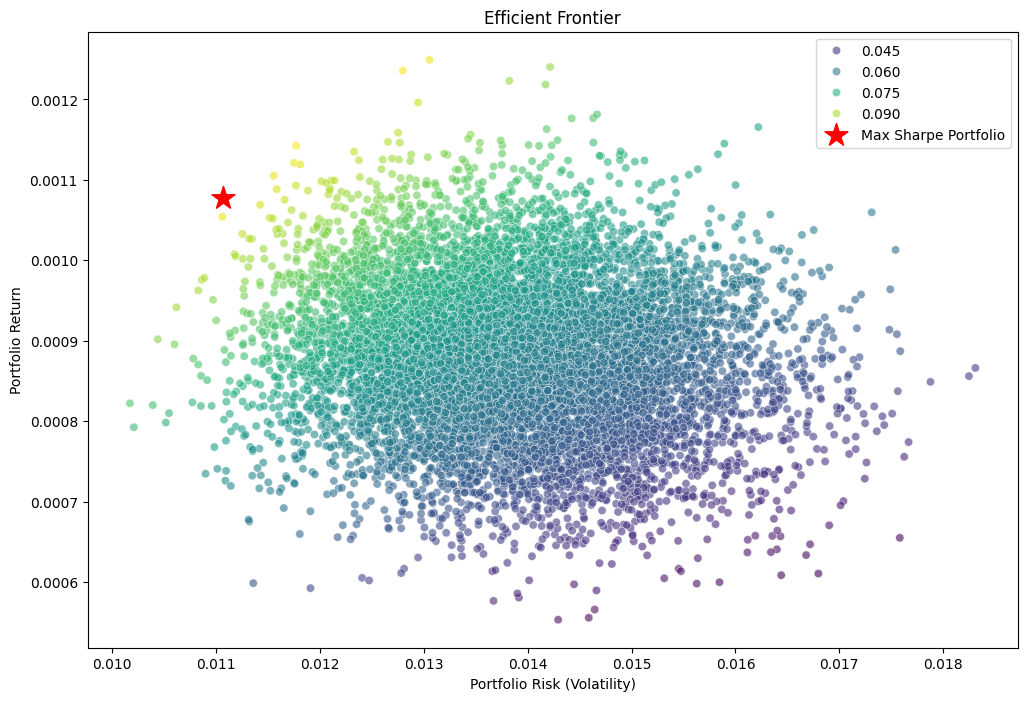

In [107]:
# Efficient frontier
plt.figure(figsize=(12,8))

sns.scatterplot(data=portfolio_df, x="risks", y="return", hue="sharpes", 
                palette="viridis", alpha=0.6, legend=True)

plt.scatter(portfolio_df.loc[max_return_idx, "risks"], portfolio_df.loc[max_return_idx, "return"],
                color="red", marker="*", s=300, label="Max Sharpe Portfolio")

plt.xlabel("Portfolio Risk (Volatility)")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier")
plt.legend()
plt.show()

The Efficient Frontier plot shows all possible portfolios generated through Monte Carlo simulation, where each point represents a different combination of asset weights. The cloud of points illustrates the trade-off between risk and return: as portfolio risk increases, expected return generally increases as well. However, not all portfolios are equally efficient. The most attractive portfolios lie along the upper-left boundary of the cloud, where returns are maximized for a given level of risk.

The highlighted red star represents the portfolio with the maximum Sharpe ratio, meaning it provides the highest return per unit of risk among all simulated portfolios. This portfolio does not have the highest return or the lowest risk, but it offers the most balanced and efficient risk-adjusted performance.

#### *CONCLUSIONS AND RECOMMENDATIONS*

Using Monte Carlo simulation, we evaluated 10,000 different portfolio combinations and identified the portfolio with the highest risk-adjusted return, measured by the Sharpe ratio (0.0967). This optimal portfolio achieves an expected daily return of approximately 0.11% with a daily volatility of 1.10%, offering the best balance between return and risk among all simulated portfolios.

Based on the volatility analysis, stocks such as TSLA and NIO exhibit the highest levels of daily volatility, making them riskier assets when considered individually. On the other hand, stocks such as JNJ, WMT, and XOM demonstrate lower volatility, indicating more stable price behavior. While commodity and healthcare stocks tend to be safer, they generally do not provide the highest returns and are therefore better suited for diversification rather than return maximization.

The optimal allocation assigns the highest weights to NVDA (14.95%), AMZN (13.02%), MS (12.83%), JNJ (12.38%), and WMT (10.30%). These stocks play different but complementary roles in the portfolio. NVDA and AMZN contribute strong return potential, while MS, identified as the most central stock in the market network through eigenvector, degree, and betweenness centrality, therefore, provides structural stability. JNJ and WMT further reduce overall risk due to their defensive characteristics.

Highly volatile stocks such as TSLA (0.48%) and XOM (0.41%) receive minimal weights in the optimal portfolio. This reflects the model’s preference to limit exposure to assets that increase portfolio volatility without sufficiently improving returns. Although TSLA is a well-established company, its volatility makes it less attractive from a risk-adjusted perspective in this diversified setting.

The results show that combining central, stable stocks with high-return with peripheral stocks leads to a well-diversified portfolio. The efficient frontier visualization confirms that the selected portfolio lies on the optimal boundary, providing the maximum return for a given level of risk. This approach highlights the importance of diversification, network structure, and risk-adjusted optimization in portfolio construction. However, the overall analysis does not account for transaction costs, policy changes, or macroeconomic shocks.

In conclusion, this project demonstrates how network-based analysis can complement traditional portfolio optimization by capturing systemic relationships between assets. Assets with higher centrality contribute more to overall portfolio risk, and adjusting allocations accordingly improves diversification outcomes. Combining network metrics with Monte Carlo simulation enables more robust, risk-aware portfolio construction.